In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
image = plt.imread("34.jpg")

In [12]:
plt.rcdefaults()

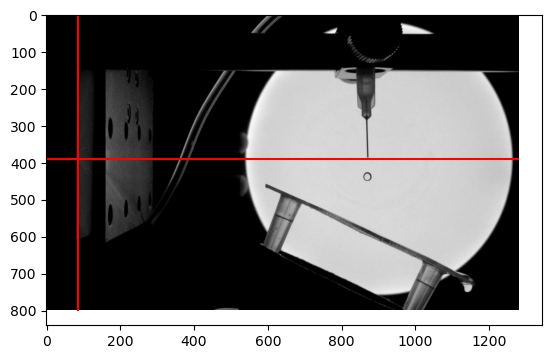

In [13]:
plt.imshow(image, cmap='gray')
plt.hlines(y=390, xmin=0, xmax=image.shape[1], color='r')
plt.vlines(x=85, ymin=0, ymax=image.shape[0], color='r');

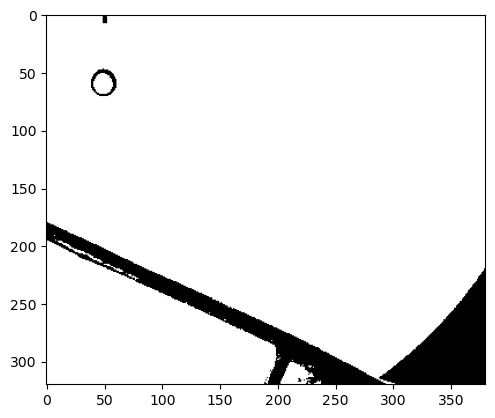

In [14]:
image_t = image[380:700, 820:1200]
image_t = (image_t>120)
image_t = image_t.astype(int)
plt.imshow(image_t, cmap='gray')

In [38]:
image.shape

(320, 380)

In [145]:
x=47
y=85
def is_center(x, y):
    # plt.imshow(image, cmap='gray')
    # plt.scatter(x, y, c='r', s=10)
    image_temp1 = image[y, :][x-12:x]
    image_temp2 = image[y, :][x:x+12]
    image_temp3 = image[:, x][y-12:y]
    image_temp4 = image[:, x][y:y+12]
    count1 = len(image_temp1) -np.count_nonzero(image_temp1)
    count2 = len(image_temp2) -np.count_nonzero(image_temp2)
    count3 = len(image_temp3) -np.count_nonzero(image_temp3)
    count4 = len(image_temp4) -np.count_nonzero(image_temp4)
    counts = [count1, count2, count3, count4]
    is_center = True
    # for i in counts:
    #     if i < 2:
    #         is_center = False
    if ((count1+count2)<6) or ((count3+count4)<6):
        is_center = False
    # if (count2+count4)<5:
    #     is_center = False
    return is_center

is_center(x, y)

False

In [154]:
xs = np.arange(45,65, 1)
ys = np.arange(50,70, 1)
centers = 0
c_x = []
c_y = []
for x in xs:
    for y in ys:
        if is_center(x, y):
            centers += 1
            c_x.append(x)
            c_y.append(y)
            # print(x, y)
print(centers)

22


In [155]:
x

64

In [156]:
cx = np.mean(c_x)
cy = np.mean(c_y)

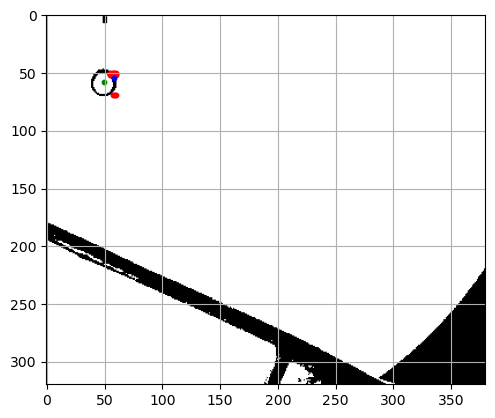

In [157]:
plt.imshow(image, cmap='gray')
plt.scatter(c_x, c_y, c='r', s=10)
plt.scatter(cx, cy, c='b', s=10)
plt.scatter(49, 58, c='g', s=10)
plt.grid()

## Using OpenCV

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
plt.rcdefaults()

In [2]:
import os

In [4]:
images = os.listdir(r"C:\Users\harik\Desktop\mini-project\data\Images")

In [5]:
images = [i for i in images if i.endswith(".jpg")]

In [7]:
centers = []
for i in range(len(images)):
    argv = r"C:\Users\harik\Desktop\mini-project\data\Images"
    argv = f"{argv}\{i}.jpg"
    src = cv.imread(argv, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_circle.py [image_name -- default ' + argv + '] \n')


    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


    gray = cv.medianBlur(gray, 5)


    rows = gray.shape[0]
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                                param1=100, param2=30,
                                minRadius=1, maxRadius=30)


    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)

    centers.append(center)
    # cv.imshow("detected circles", src)
    # cv.waitKey(0)

In [12]:
plt.rcdefaults()

In [19]:
import random

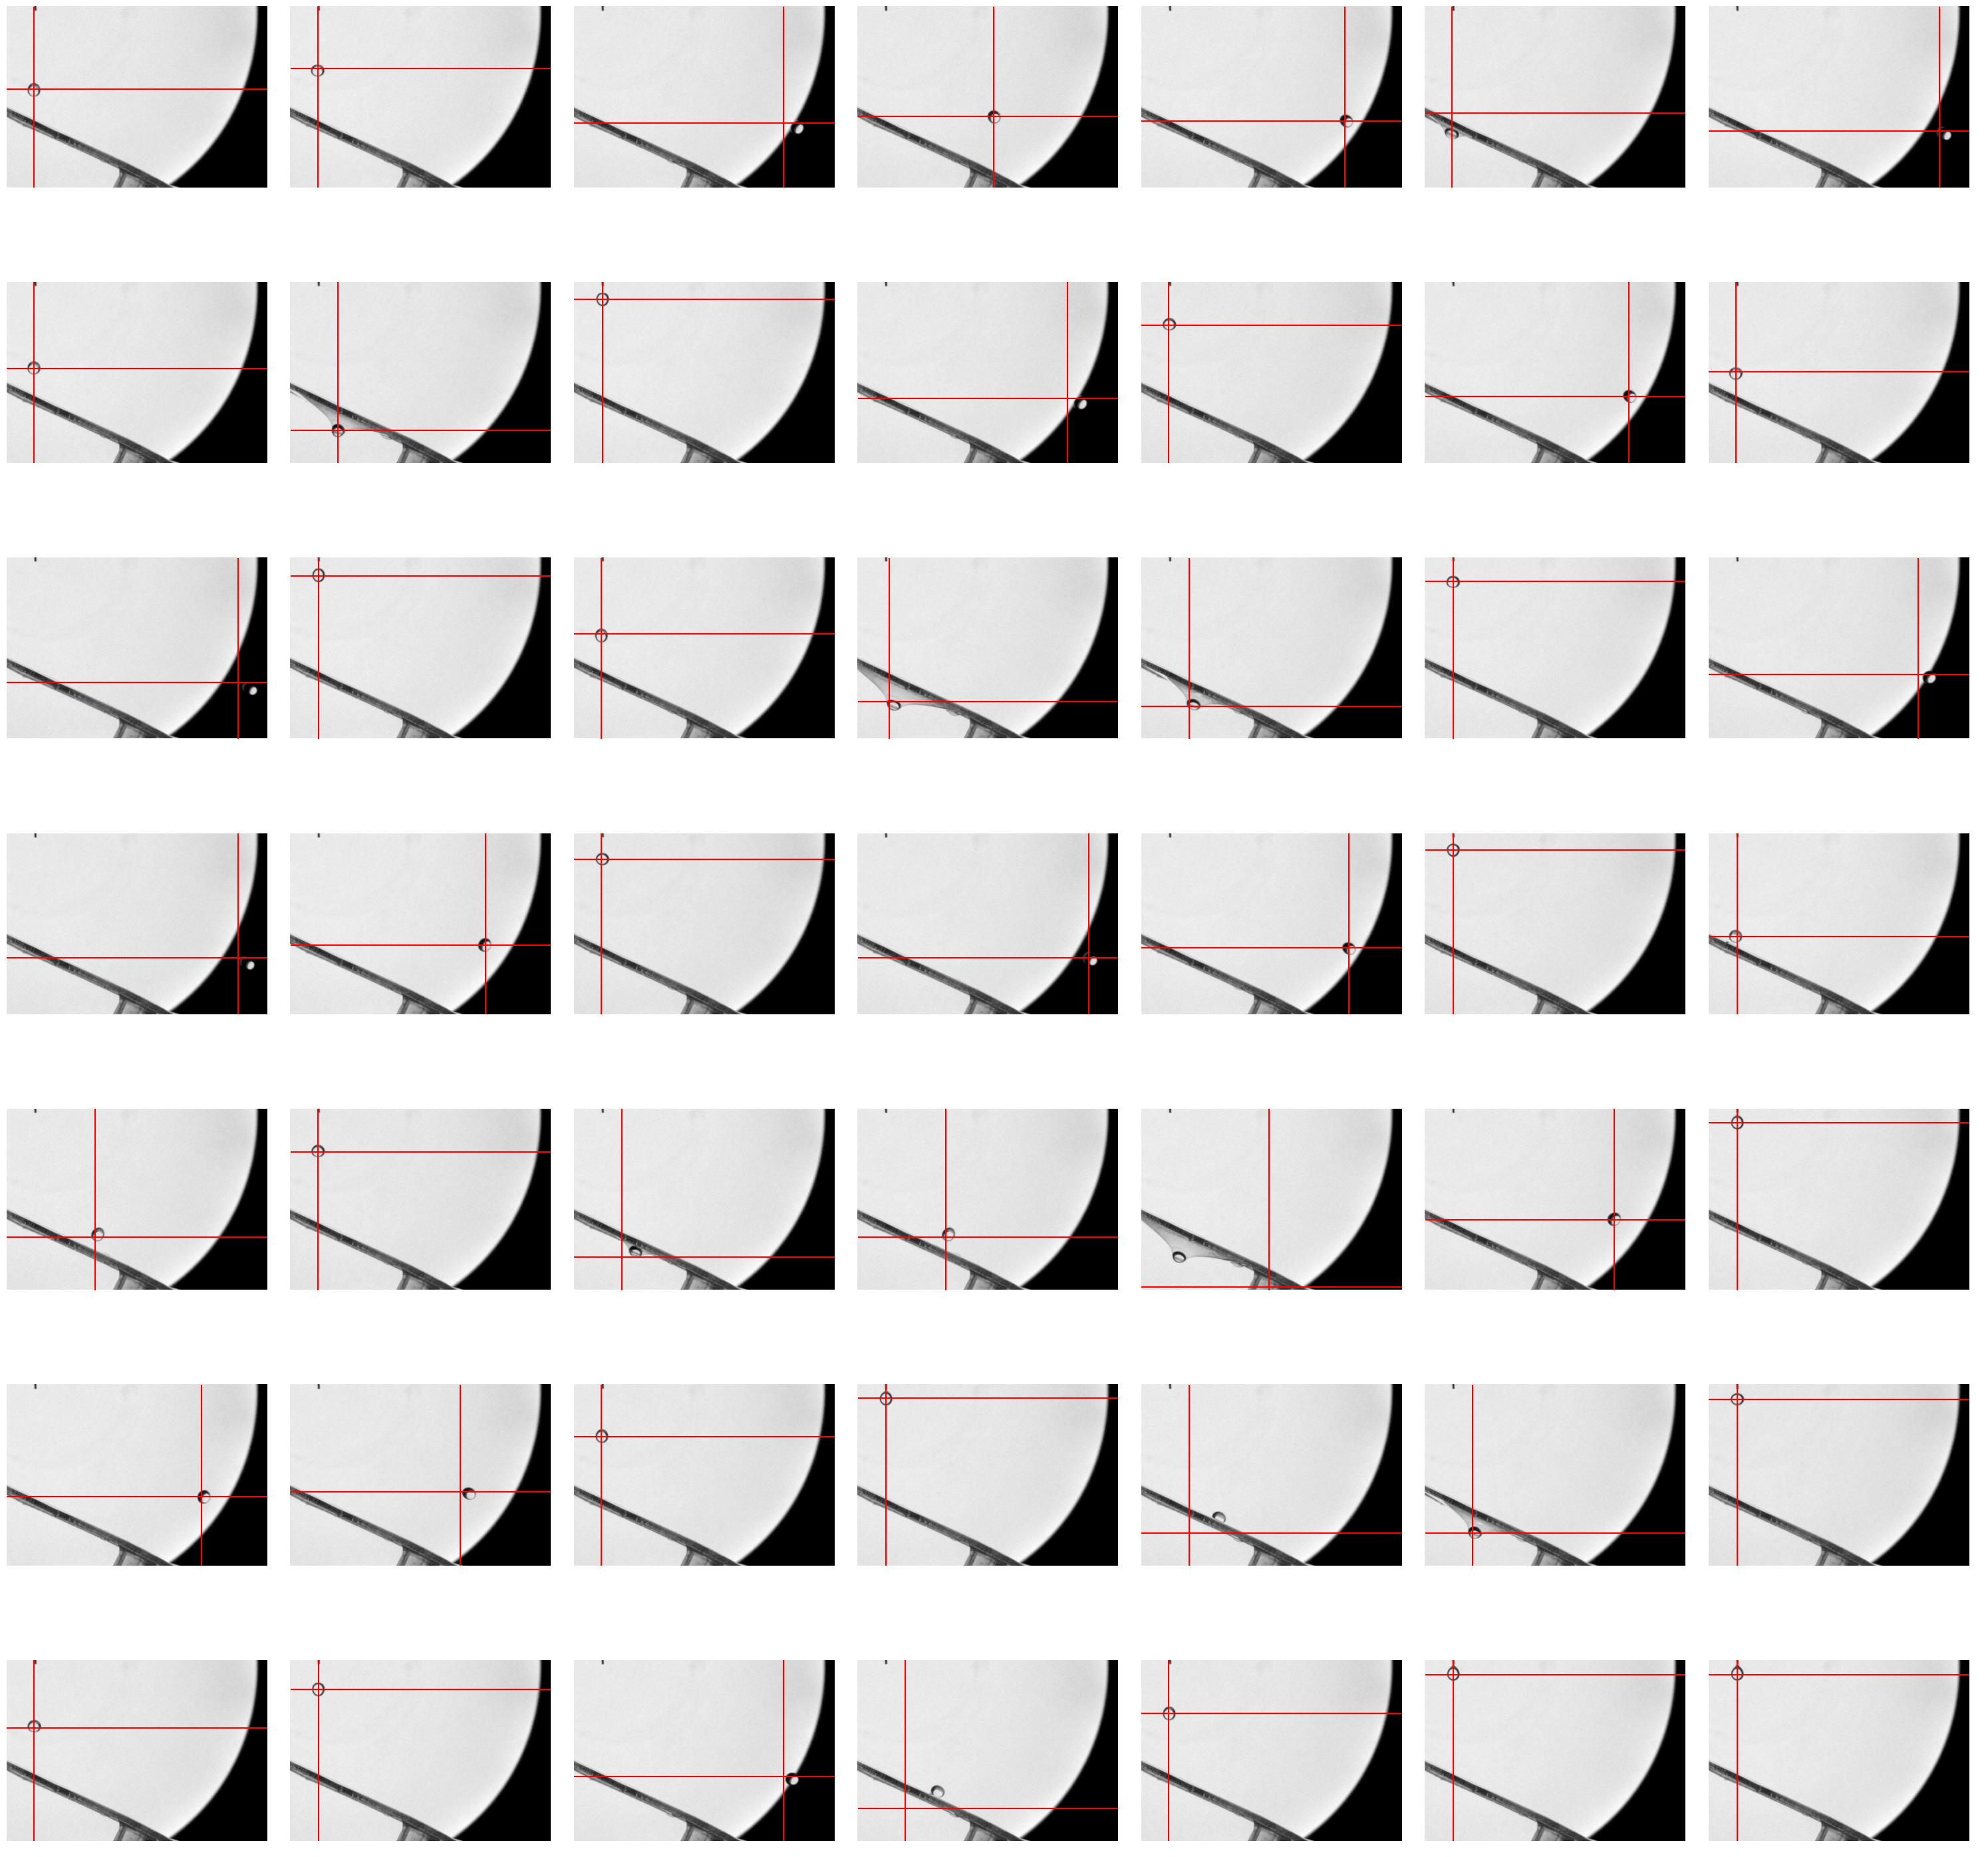

In [41]:
plt.figure(figsize=(30, 30))
all_imgs = list(range(len(images)))
for i in range(49):
    j = random.choice(all_imgs)
    directory = r"C:\Users\harik\Desktop\mini-project\data\Images"
    directory = f"{directory}\{j}.jpg"
    img = plt.imread(directory)
    img = img[380:700, 820:1300]
    c = centers[j]
    plt.subplot(7, 7, i+1)
    plt.imshow(img, cmap='gray')
    plt.hlines(c[1]-380, 0, img.shape[1], color='r')
    plt.vlines(c[0]-820, 0, img.shape[0], color='r')
    plt.axis('off')
    # plt.scatter(c[0], c[1], color='red')
plt.tight_layout()
plt.savefig("sample_with_opencv.jpg")